In [1]:
import pandas as pd
from preprocessing.pipeline import Pipe
from preprocessing.utils import numerical_features, categorical_features

In [2]:
%%time 
df = pd.read_csv('X_train_Hi5_1.csv')
test = pd.read_csv('X_test_Hi5.csv')

<timed exec>:1: DtypeWarning: Columns (108,110,111,115,117,118,122,124,125) have mixed types. Specify dtype option on import or set low_memory=False.
<timed exec>:2: DtypeWarning: Columns (1,5,108,110,111,115,117,118,122,124,125) have mixed types. Specify dtype option on import or set low_memory=False.


CPU times: user 1min 27s, sys: 14.3 s, total: 1min 41s
Wall time: 1min 41s


In [3]:
test[categorical_features]

,piezo_obtention_mode,piezo_status,piezo_qualification,hydro_hydro_quantity_elab,prelev_usage_label_0,prelev_volume_obtention_mode_label_0,prelev_usage_label_1,prelev_volume_obtention_mode_label_1,prelev_usage_label_2,prelev_volume_obtention_mode_label_2
0,Valeur mesurée,Donnée contrôlée niveau 2,Correcte,QmM,NaN,NaN,NaN,NaN,NaN,NaN
1,Valeur mesurée,Donnée contrôlée niveau 2,Correcte,QmJ,NaN,NaN,NaN,NaN,NaN,NaN
2,Valeur mesurée,Donnée contrôlée niveau 2,Correcte,QmJ,NaN,NaN,NaN,NaN,NaN,NaN
3,Valeur mesurée,Donnée contrôlée niveau 2,Correcte,QmM,NaN,NaN,NaN,NaN,NaN,NaN
4,Valeur mesurée,Donnée contrôlée niveau 2,Correcte,QmM,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
611203,Valeur mesurée,Donnée contrôlée niveau 2,Correcte,QmJ,NaN,NaN,NaN,NaN,NaN,NaN
611204,Valeur mesurée,Donnée contrôlée niveau 2,Correcte,QmJ,NaN,NaN,NaN,NaN,NaN,NaN
611205,Valeur mesurée,Donnée contrôlée niveau 2,Correcte,QmJ,NaN,NaN,NaN,NaN,NaN,NaN
611206,Valeur mesurée,Donnée contrôlée niveau 2,Correcte,QmJ,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
feats = categorical_features + numerical_features
len(feats)

102

In [5]:
pipe = Pipe(cat_cols=categorical_features,
            num_cols=numerical_features)
df = pipe.fit_transform(df)

100%|██████████| 102/102 [02:19<00:00,  1.37s/it]


In [6]:
test = pipe.transform(test)
test[categorical_features]

100%|██████████| 102/102 [00:20<00:00,  4.97it/s]


,piezo_obtention_mode,piezo_status,piezo_qualification,hydro_hydro_quantity_elab,prelev_usage_label_0,prelev_volume_obtention_mode_label_0,prelev_usage_label_1,prelev_volume_obtention_mode_label_1,prelev_usage_label_2,prelev_volume_obtention_mode_label_2
0,1,2,0,1,6,5,6,5,6,5
1,1,2,0,0,6,5,6,5,6,5
2,1,2,0,0,6,5,6,5,6,5
3,1,2,0,1,6,5,6,5,6,5
4,1,2,0,1,6,5,6,5,6,5
...,...,...,...,...,...,...,...,...,...,...
611203,1,2,0,0,6,5,6,5,6,5
611204,1,2,0,0,6,5,6,5,6,5
611205,1,2,0,0,6,5,6,5,6,5
611206,1,2,0,0,6,5,6,5,6,5


In [8]:
target = 'piezo_groundwater_level_category'

In [9]:
%%time 

# simple baseline
from lightgbm import LGBMClassifier, plot_importance
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report


model = LGBMClassifier()
le = LabelEncoder()

X_train = df[feats]
X_test = test[feats]

y_train = le.fit_transform(df[target])

model.fit(X_train, y_train)

y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       0.47      0.47      0.47    649464
           1       0.48      0.48      0.48    582020
           2       0.47      0.51      0.49    629911
           3       0.62      0.54      0.58    431844
           4       0.61      0.62      0.61    537077

    accuracy                           0.52   2830316
   macro avg       0.53      0.52      0.53   2830316
weighted avg       0.52      0.52      0.52   2830316

CPU times: user 16min 45s, sys: 16.4 s, total: 17min 1s
Wall time: 1min 56s


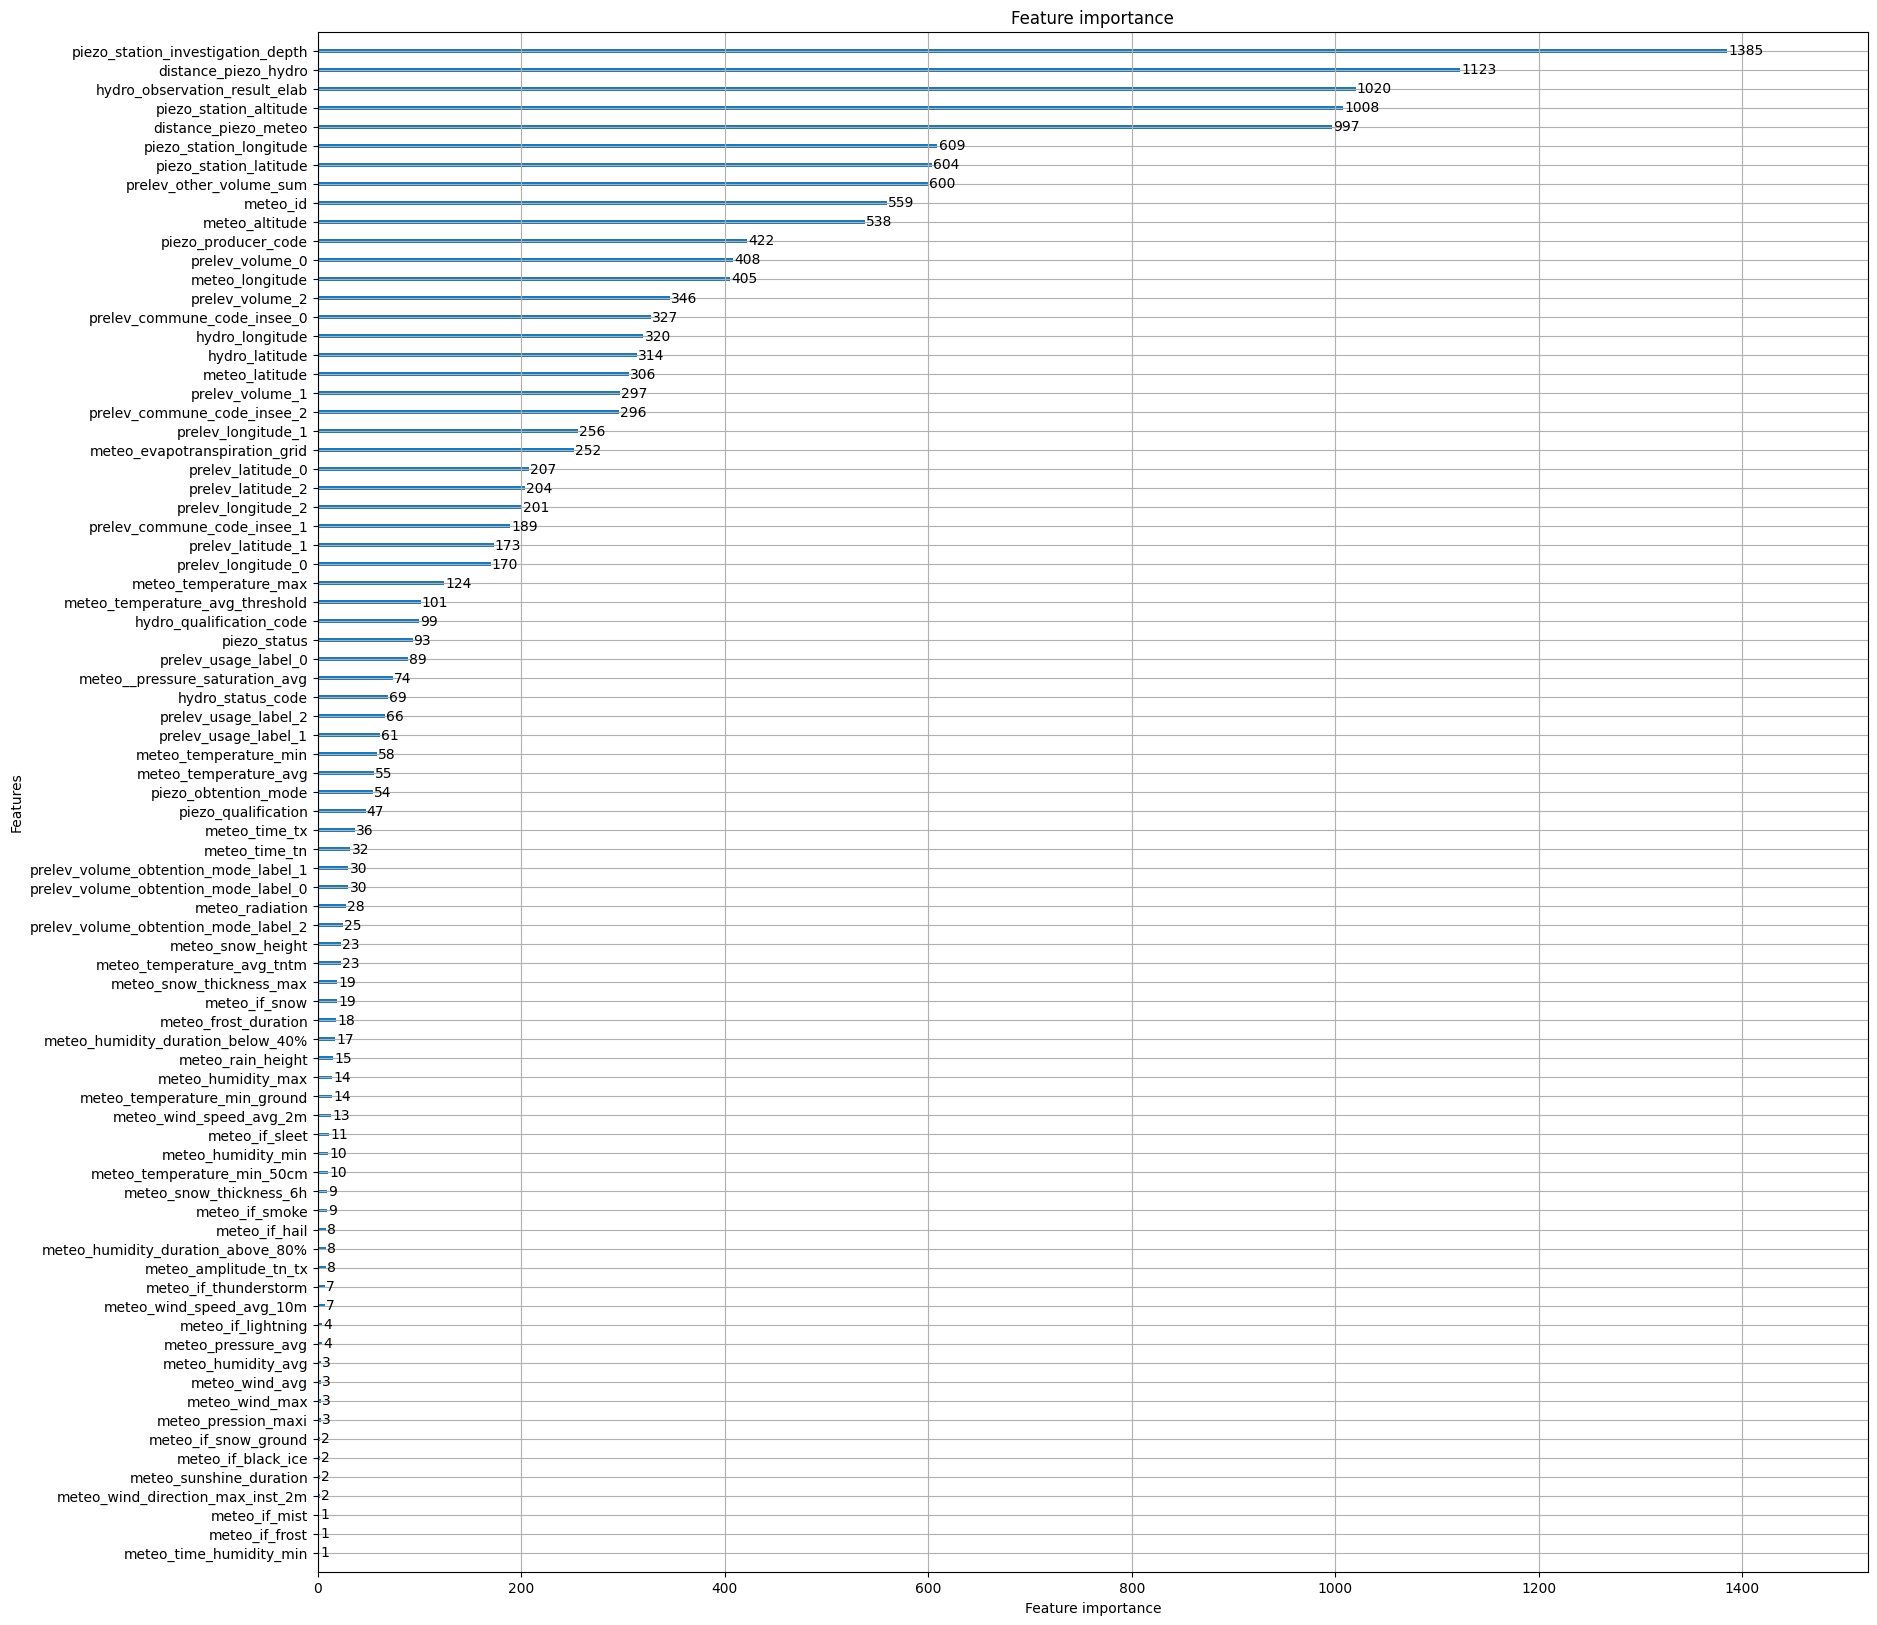

In [10]:
plot_importance(model, figsize=(20, 20));

In [15]:
test['piezo_groundwater_level_category'] = le.inverse_transform(y_pred_test)
test[['row_index', 'piezo_groundwater_level_category']].to_csv('baseline.csv', index=False)